# Iranian Customer Churn 

### Loading libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## 1. Business Problem 

Customer churn is an important business problem in the telecom industry. With a customer base increasing rapidly on a daily basis, customers leaving is also an issue. Customer retention could be costlier than having a customer unsubscribe, therefore it is useful to know beforehand which customers will stay and which will leave or churn. 

By definition, customer churn is the percentage of customers who unsubscribed from the business. But it can also be translated to a binary classification problem as to wether the customer will churn or not churn. 

## 2. About the dataset

A dataset of randomly selected customers from an Iranian telecom company over a period of 12 months. It contains 3150 rows and 14 columns of which 13 are predictor variables and 1 is the outcome variable. Each row represents one customer and each column is an attribute of that customer. The outcome variable is Churn which will be predicted if the customer will unsubscribe to the company (churn-1) or continue (not-churn-0). It contains no missing values and the datatypes are detected appropriately for processing.

Before processing the dataset to check for the datatypes understood by Python, the following are their dataypes by virtue of the nature of the definition. 

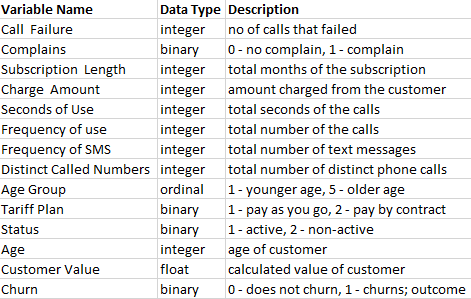

## 3.1. Importing the dataset

In [5]:
dataset_name = input('Name of the dataset: ')

Name of the dataset: iranian_cust_churn.csv


In [6]:
def read_csv(dataset_name):
    original_data = pd.read_csv(dataset_name, sep = ',', header = 0)
    return original_data

## 3.2. Dimensions of the dataset

In [7]:
def dimensions(dataset_name):
    dim = read_csv(dataset_name).shape
    return dim

In [8]:
dimensions(dataset_name)

(3150, 14)

## 4. Conversion of datatypes of variables

### 4.1. Original datatypes of the variables from Python

In [9]:
def data_types(dataset_name):
    return read_csv(dataset_name).dtypes

In [10]:
data_types(dataset_name)

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

### 4.2. Conversion of datatypes through Label Encoding

In [11]:
def preprocess_data(dataset_name):
    data = read_csv(dataset_name)
    has_object = any(data.dtypes == 'object')
    has_bool = any(data.dtypes == 'bool')
    
    if has_object or has_bool:
        label_encoder = LabelEncoder()
        for col in data.columns:
            if data[col].dtype == 'object' or data[col].dtype == 'bool':
                data[col] = label_encoder.fit_transform(data[col])
        processed_data = data
    else:
        processed_data = data
    
    return processed_data


In [12]:
preprocess_data(dataset_name).dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

The variables that were assumed to be binary or ordinal were detected as integers and have been kept as so throughout the subsequent codes. This is because it would be appropriate to use them for statistical computations in those formats only. 

Therefore, our class variable: Churn, is also detected as an integer. 

## 5. Missing Values Detection

In [13]:
def missing_vals(dataset_name):
    return preprocess_data(dataset_name).isna().sum()

In [14]:
missing_vals(dataset_name)

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

There are no missing values in this dataset.

## 6. Descriptive Summary Stats of Dataset

In [15]:
def descr(dataset_name):
    return preprocess_data(dataset_name).describe().applymap('{:.2f}'.format)

In [16]:
descr(dataset_name)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00,3150.00
mean,7.63,0.08,32.54,0.94,4472.46,69.46,73.17,23.51,2.83,1.08,1.25,31.00,470.97,0.16
std,7.26,0.27,8.57,1.52,4197.91,57.41,112.24,17.22,0.89,0.27,0.43,8.83,517.02,0.36
min,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,15.00,0.00,0.00
25%,1.00,0.00,30.00,0.00,1391.25,27.00,6.00,10.00,2.00,1.00,1.00,25.00,113.80,0.00
50%,6.00,0.00,35.00,0.00,2990.00,54.00,21.00,21.00,3.00,1.00,1.00,30.00,228.48,0.00
75%,12.00,0.00,38.00,1.00,6478.25,95.00,87.00,34.00,3.00,1.00,1.00,30.00,788.39,0.00
max,36.00,1.00,47.00,10.00,17090.00,255.00,522.00,97.00,5.00,2.00,2.00,55.00,2165.28,1.00


### 6.1. Interpretation of Summary Stats

The variables which will be discussed here are: Call Failure, Subscription Length, Seconds of Use, Frequency of Use, Frequency of SMS, Distinct Called Numbers, Age and Customer Value. 

It is easy to cite the quartiles of each of the variables, but it would be more useful to understand the impact of each of these variables through their mean, standard deviation and maximum values. Each of their means are between 5 to 100, except for Seconds of Use and Customer Value which have means at 4472.46 seconds and 470.97 rial (assuming), respectively. This is because their maximum values have a much greater magnitude than all the other numeric variables by nature of the variable. The max of Seconds of Use falls in 10 thousands and Customer Value in thousands; while all other variables are in the range of tens to hundreds. 

This also implies that boxplots of call usage attributes and Customer Value will have dispersion of datapoints, may be skewed and will definitely contain outliers. 

Lastly, if we analyze the Age variable, its quartiles and mean are very close. It is expected for the boxplots to not have much dispersion of datapoints. 

## 7. Boxplots

In [17]:
def extract_numeric_cols(dataset_name):
    return preprocess_data(dataset_name).select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

In [18]:
extract_numeric_cols(dataset_name)

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

### 7.1. Boxplots Generation

In [19]:
def boxplots(dataset_name):
    numeric_columns = extract_numeric_cols(dataset_name)
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(30, 16))

    for i, col in enumerate(numeric_columns):
        axs[i].boxplot(preprocess_data(dataset_name)[col])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

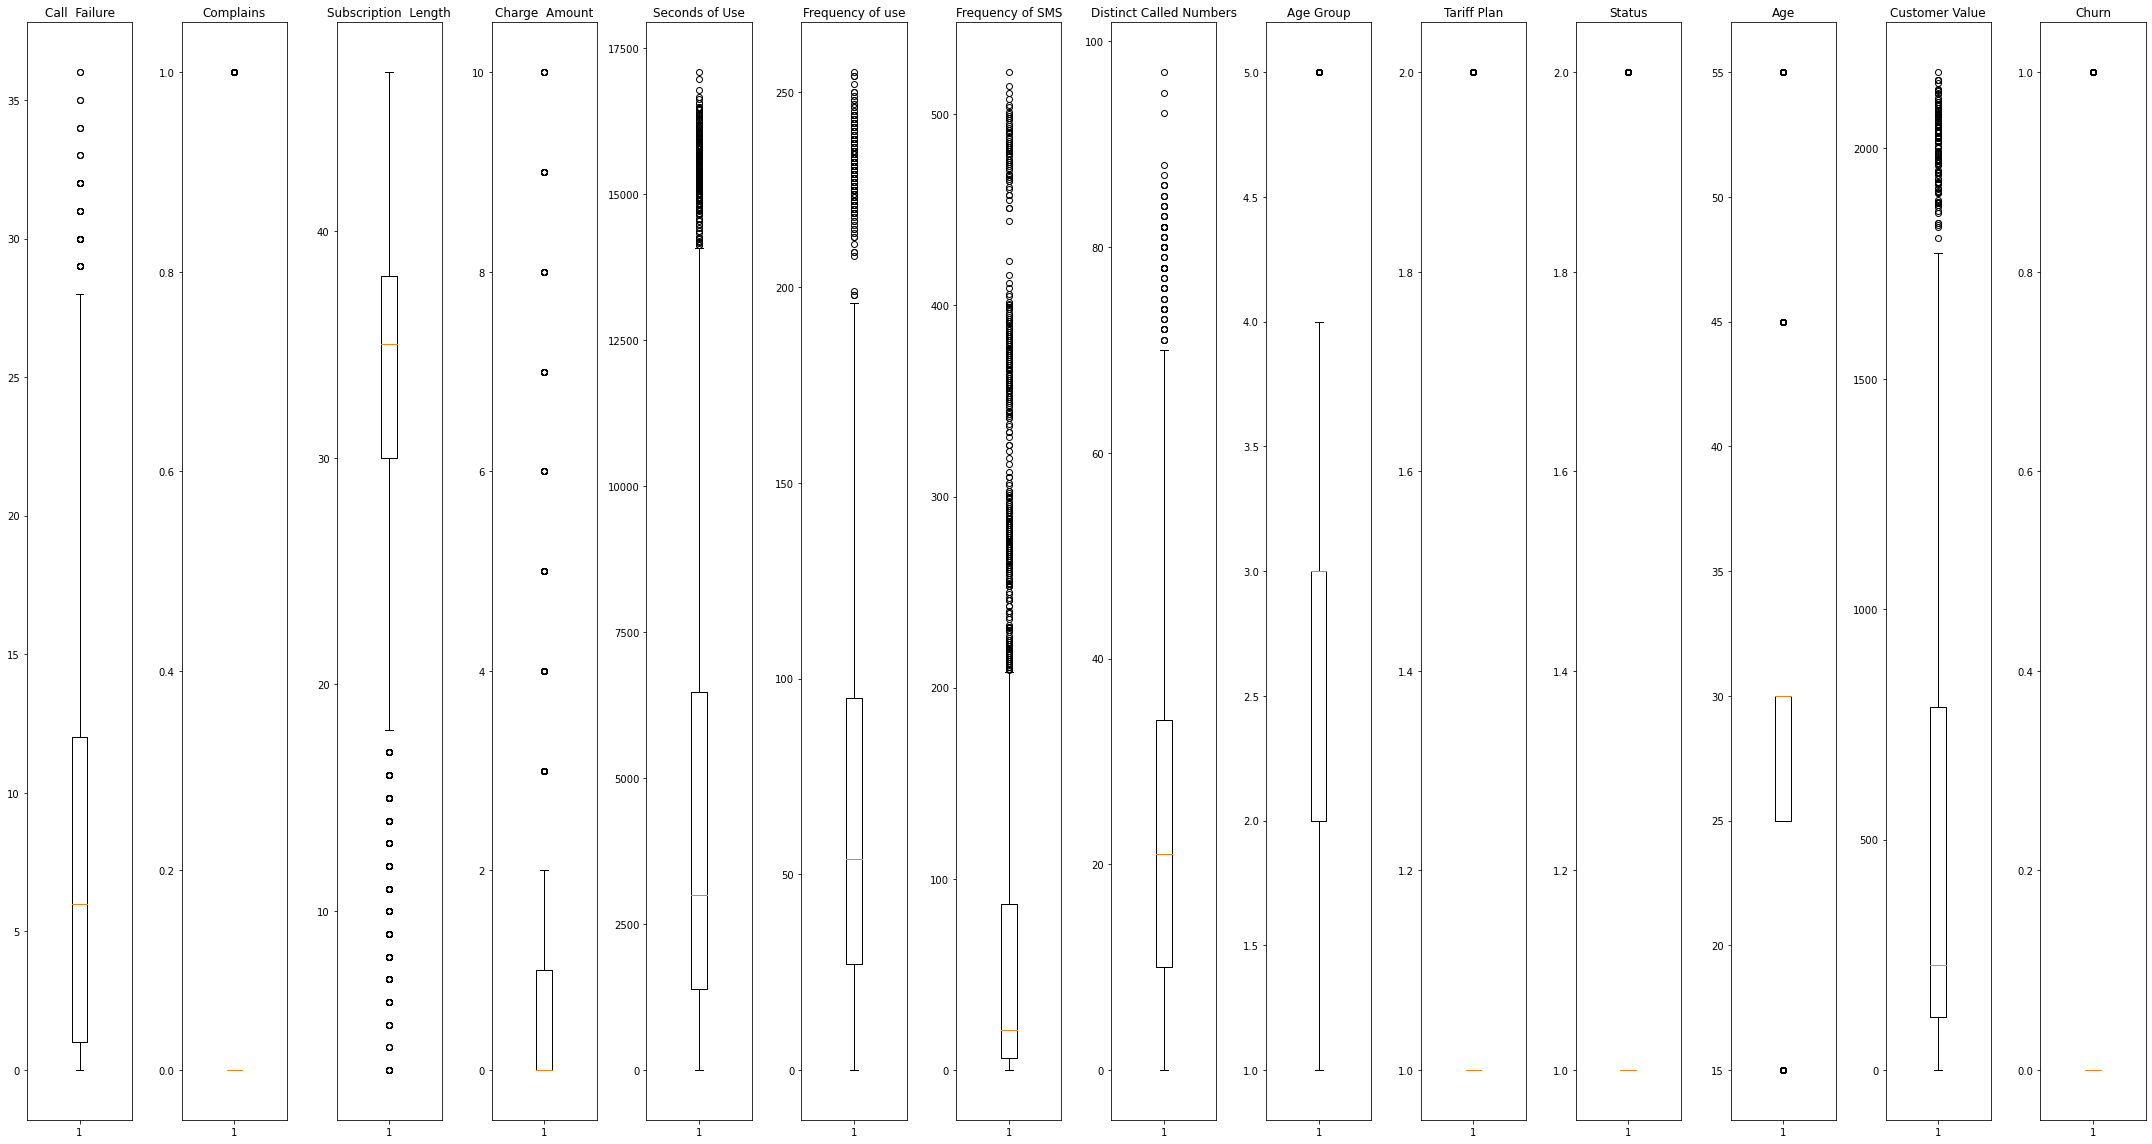

In [20]:
boxplots(dataset_name)

### 7.1.1. Interpretation of Boxplots

It is evident that the boxplots are not similar and so, they do not follow a similar distribution. Other insights are that integer columns of Seconds of Use, Frequency of Use, Frequency of SMS  and Customer Value have the most outliers followed by Distinct Called Numbers also. These outliers are not imputed for this dataset however. The magnitudes of Seconds of Use and Customer Value are much greater. 

If attention is paid to skewness and kurtosis of the boxplots, then let's discuss those for a few attributes:

1) The Seconds of Use attribute is positively skewed for its median is closer to Q1. This implies that most of the callers have made calls of relatively fewer seconds. However, the upper whisker is much higher which means that there are many callers with excessive time on call. This also translates to a longer tail length i.e. many callers fall outside of the IQR. This also confirms the existence of outliers. Therefore, the Seconds of Use variable is positively skewed and platykurtic. 

2) Other variables like: Frequency of Use, Frequency of SMS and Customer Value follow the same nature as that of 1) i.e. are positively skewed and platykurtic and have any outliers. While Distinct Called Numbers is relatively normally skewed, but also platykurtic. The interpretation is the many customers have subscribed to the service fewer times, SMS-ed fewer times but due to longer tail length, most of the customers lie outside of the IQR and boosted the frequency of the services. While for Customer Value, there any many customers whose business value is on the cheaper side. But there more customers whose worth in the eyes of the company is much greater, and hence amplify the overall customer value.  

3) The last is Subscription Length which is relatively normally distributed but with a few outliers on the lower whisker side. This means that the duration of the subscription follows close to a normal distribution. However, there are some customers who have unsubscribed very quickly. 

### 7.2. Boxplot Stats

In [21]:
def boxplot_stats(dataset_name):
    column_names = extract_numeric_cols(dataset_name)
    boxplot_stats_list = []
    for column_name in column_names:

        minimum = min(preprocess_data(dataset_name)[column_name])
        maximum = max(preprocess_data(dataset_name)[column_name])
        
        q1 = np.percentile(preprocess_data(dataset_name)[column_name], 25)
        q2 = np.percentile(preprocess_data(dataset_name)[column_name], 50)
        q3 = np.percentile(preprocess_data(dataset_name)[column_name], 75)

        iqr = q3 - q1

        whisker_low = q1 - 1.5 * iqr
        whisker_high = q3 + 1.5 * iqr

        boxplot_stats_list.append({
            'column_name': column_name,
            'whisker_low': whisker_low,
            'min': minimum,
            'q1': q1,
            'q2': q2,
            'q3': q3,
            'whisker_high': whisker_high,
            'max': maximum,
            'iqr': iqr
        })
        
    boxplot_stats_df = pd.DataFrame(boxplot_stats_list).set_index('column_name')
    return boxplot_stats_df.applymap('{:.2f}'.format)

In [22]:
boxplot_stats(dataset_name)

,whisker_low,min,q1,q2,q3,whisker_high,max,iqr
column_name,,,,,,,,
Call Failure,-15.50,0.00,1.00,6.00,12.00,28.50,36.00,11.00
Complains,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
Subscription Length,18.00,3.00,30.00,35.00,38.00,50.00,47.00,8.00
Charge Amount,-1.50,0.00,0.00,0.00,1.00,2.50,10.00,1.00
Seconds of Use,-6239.25,0.00,1391.25,2990.00,6478.25,14108.75,17090.00,5087.00
Frequency of use,-75.00,0.00,27.00,54.00,95.00,197.00,255.00,68.00
Frequency of SMS,-115.50,0.00,6.00,21.00,87.00,208.50,522.00,81.00
Distinct Called Numbers,-26.00,0.00,10.00,21.00,34.00,70.00,97.00,24.00
Age Group,0.50,1.00,2.00,3.00,3.00,4.50,5.00,1.00


It is clear that all the true numeric variables have datapoints that fall outside of the IQR which was identified from the boxplots as well.

### Class Variable Name

In [23]:
def class_var_name():
    class_variable = input('What is the name of the class column? ')
    return class_variable

In [24]:
class_variable = class_var_name()

What is the name of the class column? Churn


## 8. Bar and Frequency plots

In [25]:
def cols_for_freq_plots():
    columns_list = input('Enter column names separated by commas: ').split(', ')
    return columns_list

In [26]:
cols_for_freq_plots = cols_for_freq_plots()

Enter column names separated by commas: Complains, Age Group, Tariff Plan, Status, Churn


In [27]:
def frequency_plots(dataset_name, class_variable, cols_for_freq_plots):
    dataset = read_csv(dataset_name)
    num_plots = len(cols_for_freq_plots)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))

    if num_rows == 1:
        axes = [axes]
    
    for idx, col in enumerate(cols_for_freq_plots):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        
        ax = axes[row_idx][col_idx]

        sns.countplot(x=col, data=dataset, ax=ax)
        ax.set_title(f'Frequency Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        
    plt.tight_layout()
    plt.show()

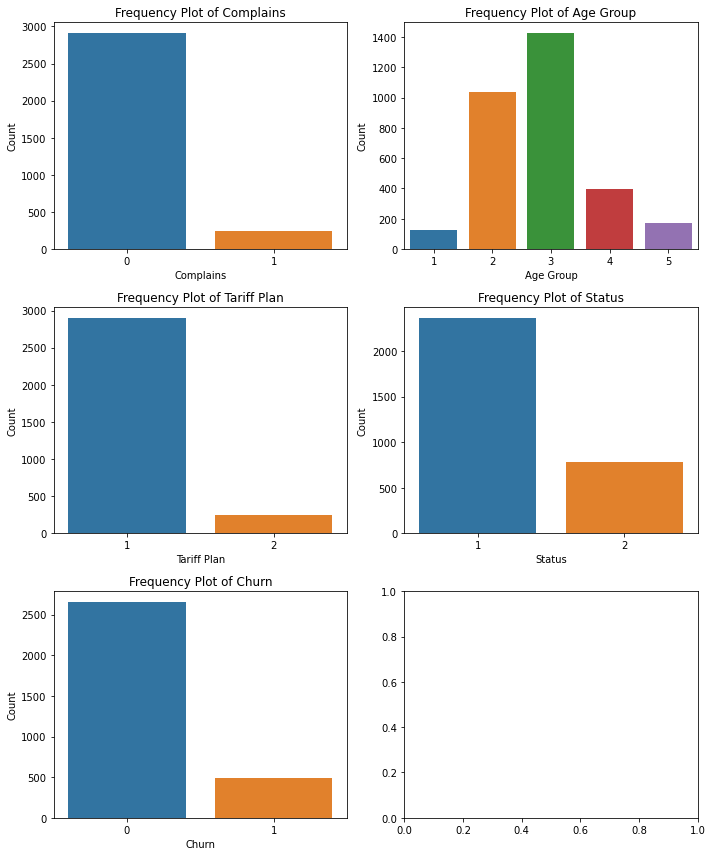

In [28]:
frequency_plots(dataset_name, class_variable, cols_for_freq_plots)

### 8.1. Interpretation of Frequency Plots

Other variables in the dataset which are inherently categorical include: Complains, Tariff Plan, Status, Age Group and Churn. Specific interpretations are as follows, but goes without saying that almost all categorical variables are imbalanced. 

1) In the Churn plot, there were more than 5 times the customers who did not churn than those who churned

2) Fewer customers with Complains

3) More customers had an Active Status

4) The Age Group variable was fairly normally distributed with the middle-aged customers being the mode 

In [29]:
def cat_cols():
    cat_cols = input('Enter column names separated by commas: ').split(', ')
    return cat_cols

In [30]:
categorical_cols = cat_cols()

Enter column names separated by commas: Complains, Age Group, Tariff Plan, Status


In [31]:
def binary_categorical_barplots(dataset_name, class_variable, categorical_cols):
    dataset = pd.read_csv(dataset_name)
    num_plots = len(categorical_cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    if num_plots % 2 != 0:
        num_cols = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
    
    if num_rows > 1:  
        for idx, col in enumerate(categorical_cols):
            row_idx = idx // num_cols
            col_idx = idx % num_cols

            ax = axes[row_idx][col_idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
    else:  
        for idx, col in enumerate(categorical_cols):
            ax = axes[idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
        
    plt.tight_layout()
    plt.show()

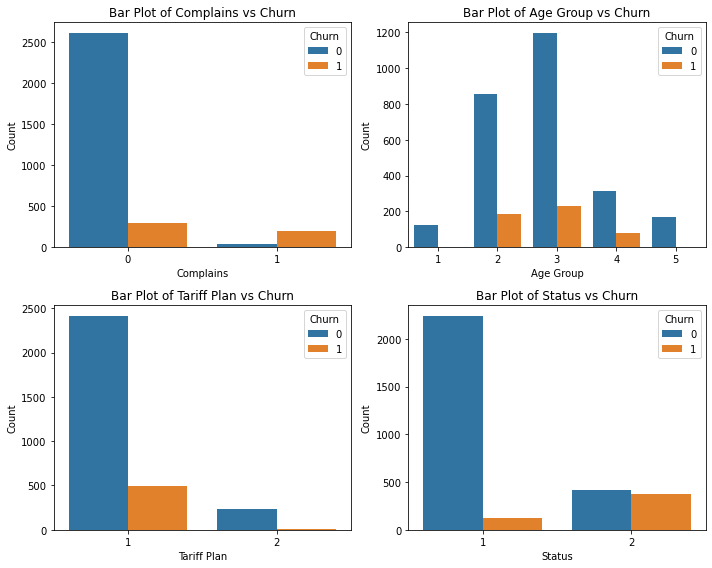

In [32]:
binary_categorical_barplots(dataset_name, class_variable, categorical_cols)

### 8.2. Interpretation of Categorical Bar Plots

It is also interesting to see that from within the clusters of each variable, how many churn and how many don't. 

1) Of the people who have Complains, more customer churn and the remaining few stay

2) Of the people in Tariff Plan, those who pay as they go (1) have more customers who stay. While of the people who are on contract, nobody has churned

3) Of those who have an inactive Status (2), the amount of churners and non-chuners are close to equal

4) While across every group, there are much fewer customer churns more customers have chosen to stay

So overall, more customers have stayed than churned except for those who had Complains. 

## 9. Correlation Analysis

In [33]:
def corr_heatmap(dataset_name, class_variable):
    corr_matrix = preprocess_data(dataset_name).corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(10, 4))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    
    plt.title('Correlation Heatmap')
    plt.show()


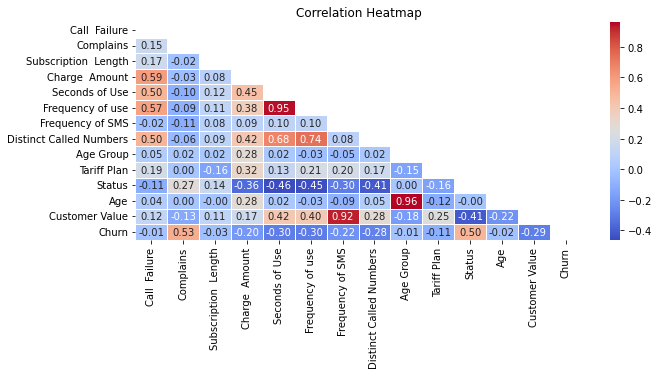

In [34]:
corr_heatmap(dataset_name, class_variable)

### 9.1. Interpretation of Correlation Heatmap

The variables which show to have the strongest correlation are: Frequency of Use and Seconds of Use (+95%), Customer Value and Frequency of SMS (+92%) and of course Age Group with Age (+96%). The last correlation is quite obvious. While an interpretation for the first two could be:

1) As the frequency of use increases, the seconds of usage also increases resulting in a positive relation. 

2) As the frequency of SMS increases, this financially may add to the value of the customer according to the backend revenue structure of the company. Hence increasing the Customer Value. 

While with the class variable, churn, all of the predictor variables are not strongly correlated, but largely most of them have negative relations with churn:

1) Call Failure, Subscription Length, Tariff Plan, Age Group and Age have very weak correlation (-1% to -11%) regardless of sign.  

2) AS the seconds, freuency of use, the frequency of SMS, the no of distinct called numbers decrease and the customer value, the chance to churn might increase. All of this is in line with the negative sign.

However, it is unusual for Complains and Status to be positively correlated with Churn, yet they have a moderate correlation with the class variable. 

## 10. Feature Selection 

Features have been selected through an approach using the correlations with the outcome variable. Those variables with absolute correlation between 0.2 and 1.0 with the outcome variable will be selected. Rest will be dropped. 

The idea is to choose variables with close to moderate to strong correlation with the class variable.

In [35]:
def feature_selection_by_corr(dataset_name, class_variable):
    corr_matrix = preprocess_data(dataset_name).corr()
    corr_with_target = corr_matrix[class_variable].drop(class_variable)

    ranked_features_df = pd.DataFrame({'Feature': corr_with_target.index, 'Correlation': corr_with_target.values})
    ranked_features_df.sort_values(by='Correlation', ascending=False, inplace=True)
    
    selected_features = ranked_features_df[(abs(ranked_features_df['Correlation']) >= 0.2) & (abs(ranked_features_df['Correlation']) <= 1.0)]['Feature'].tolist()
    
    return selected_features


In [36]:
feature_selection_by_corr(dataset_name, class_variable)

['Complains',
 'Status',
 'Charge  Amount',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Customer Value',
 'Seconds of Use',
 'Frequency of use']

In [37]:
def drop_unselected_features(dataset_name, class_variable):
    dataset = preprocess_data(dataset_name)
    
    selected_features = feature_selection_by_corr(dataset_name, class_variable)
    selected_dataset = dataset[selected_features + [class_variable]]

    return selected_dataset

In [38]:
drop_unselected_features(dataset_name, class_variable)

,Complains,Status,Charge Amount,Frequency of SMS,Distinct Called Numbers,Customer Value,Seconds of Use,Frequency of use,Churn
0,0,1,0,5,17,197.640,4370,71,0
1,0,2,0,7,4,46.035,318,5,0
2,0,1,0,359,24,1536.520,2453,60,0
3,0,1,0,1,35,240.020,4198,66,0
4,0,1,0,2,33,145.805,2393,58,0
...,...,...,...,...,...,...,...,...,...
3145,0,1,2,92,44,721.980,6697,147,0
3146,0,1,1,80,42,261.210,9237,177,0
3147,0,1,4,38,21,280.320,3157,51,0
3148,0,1,2,222,12,1077.640,4695,46,0


In [39]:
def dimensions2(dataset_name, class_variable):
    dim = drop_unselected_features(dataset_name, class_variable).shape
    return dim

In [40]:
dimensions2(dataset_name, class_variable)

(3150, 9)

This processed and feature selected data is what will be used for model training and evaluating from this point onwards. The data now has 3150 rows and 9 columns (8 predictor variables and 1 outcome variable).

## 11. Data Splits with selected features only

In [41]:
def tvt_splits_fs(dataset_name, class_variable):
    y = drop_unselected_features(dataset_name, class_variable)[[class_variable]]
    X = drop_unselected_features(dataset_name, class_variable).drop(columns = [class_variable])
    # X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(read_csv(data), target = class_variable, train_size=0.6, valid_size=0.2, test_size=0.2, random_state = None) 
    
    total_size = len(preprocess_data(dataset_name))
    train_size = int(total_size * 0.6)
    valid_size = int(total_size * 0.2)

    # Split the data
    X_train, y_train = drop_unselected_features(dataset_name, class_variable).iloc[:train_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[:train_size, -1]
    X_valid, y_valid = drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, -1]
    X_test, y_test = drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, -1]
    
    y_train = pd.Series(y_train).to_frame(name=class_variable)
    y_valid = pd.Series(y_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [42]:
def splits_tabulated_fs(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)
    
    dataframes = [X_train, X_valid, X_test, y_train, y_valid, y_test]

    dataframe_names = ['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test']

    dataframe_shapes = {}
    for i, dataframe in enumerate(dataframes):
        dataframe_shapes[dataframe_names[i]] = dataframe.shape

    shape_train_test = pd.DataFrame.from_dict(dataframe_shapes, orient='index', columns=['Rows', 'Columns'])

    return shape_train_test

In [43]:
splits_tabulated_fs(dataset_name, class_variable)

,Rows,Columns
X_train,1890,8
X_valid,630,8
X_test,630,8
y_train,1890,1
y_valid,630,1
y_test,630,1


## 12. Applying and Evaluating model without CV

In [44]:
def model_without_CV(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)

    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    y_test = y_test.values.ravel()

    knn = KNeighborsClassifier(n_neighbors=5) 

    # Train
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)

    print('ROC for Train Set:')
    fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    print(classification_report(y_train, y_pred_train))
    
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'Train Precision: {precision_train:.4f}')
    print(f'Train Recall: {recall_train:.4f}')
    print(f'Train F1-score: {f1_train:.4f}')
    print(f'Train AUC: {auc_train:.4f}\n')

    # Valid
    y_pred_valid = knn.predict(X_valid)

    print('ROC for Validation Set:')
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:, 1])
    plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Validation Set Metrics:')
    print(classification_report(y_valid, y_pred_valid))
    
    precision_valid = precision_score(y_valid, y_pred_valid)
    recall_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)
    print(f'Validation Precision: {precision_valid:.4f}')
    print(f'Validation Recall: {recall_valid:.4f}')
    print(f'Validation F1-score: {f1_valid:.4f}')
    print(f'Validation AUC: {auc_valid:.4f}\n')

    # Test
    y_pred_test = knn.predict(X_test)

    print('ROC for Test Set:')
    fpr_test, tpr_test, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Test Set Metrics:')
    print(classification_report(y_test, y_pred_test))
    
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f'Test Precision: {precision_test:.4f}')
    print(f'Test Recall: {recall_test:.4f}')
    print(f'Test F1-score: {f1_test:.4f}')
    print(f'Test AUC: {auc_test:.4f}')

ROC for Train Set:


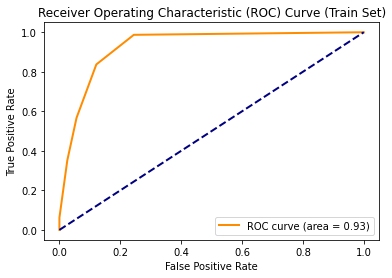

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1583
           1       0.66      0.57      0.61       307

    accuracy                           0.88      1890
   macro avg       0.79      0.76      0.77      1890
weighted avg       0.88      0.88      0.88      1890

Train Precision: 0.6616
Train Recall: 0.5668
Train F1-score: 0.6105
Train AUC: 0.9279

ROC for Validation Set:


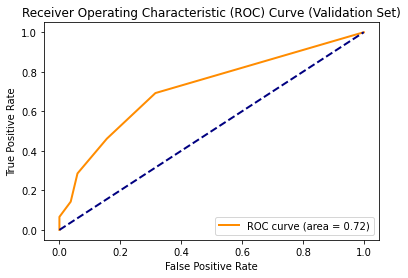

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       539
           1       0.45      0.29      0.35        91

    accuracy                           0.85       630
   macro avg       0.67      0.61      0.63       630
weighted avg       0.82      0.85      0.83       630

Validation Precision: 0.4483
Validation Recall: 0.2857
Validation F1-score: 0.3490
Validation AUC: 0.7160

ROC for Test Set:


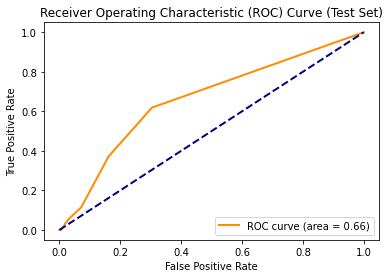

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       533
           1       0.22      0.11      0.15        97

    accuracy                           0.80       630
   macro avg       0.54      0.52      0.52       630
weighted avg       0.76      0.80      0.78       630

Test Precision: 0.2245
Test Recall: 0.1134
Test F1-score: 0.1507
Test AUC: 0.6598


In [45]:
model_without_CV(dataset_name, class_variable)

## 13. Applying and Evaluating Model with CV

In [46]:
def model_with_CV(dataset_name, class_variable):
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(drop_unselected_features(dataset_name, class_variable).drop(columns=[class_variable]), drop_unselected_features(dataset_name, class_variable)[class_variable], test_size=0.2, random_state=42)
    y_train_valid = pd.Series(y_train_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    knn = KNeighborsClassifier(n_neighbors=5)
    k = 5

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    cv_scores = cross_val_score(knn, X_train_valid, y_train_valid.values.ravel(), cv=kf, scoring='accuracy')  # Example metric: accuracy
    best_score_index = cv_scores.argmax()
    best_knn = KNeighborsClassifier(n_neighbors=5) 
    best_knn.fit(X_train_valid, y_train_valid.values.ravel())

    y_pred_train = best_knn.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='orange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    train_report = classification_report(y_train.values.ravel(), y_pred_train)
    print(train_report)
    
    train_precision = precision_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_recall = recall_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_f1 = f1_score(y_train.values.ravel(), y_pred_train, average='weighted')
    print(f'Train Overall Precision: {train_precision:.4f}')
    print(f'Train Overall Recall: {train_recall:.4f}')
    print(f'Train Overall F1-score: {train_f1:.4f}\n')

    y_pred_valid = best_knn.predict(X_valid)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])

    plt.figure()
    plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Validation Set Metrics:')
    valid_report = classification_report(y_valid.values.ravel(), y_pred_valid)
    print(valid_report)

    valid_precision = precision_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_recall = recall_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_f1 = f1_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    print(f'Validation Overall Precision: {valid_precision:.4f}')
    print(f'Validation Overall Recall: {valid_recall:.4f}')
    print(f'Validation Overall F1-score: {valid_f1:.4f}\n')

    y_pred_test = best_knn.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Test Set Metrics:')
    test_report = classification_report(y_test.values.ravel(), y_pred_test)
    print(test_report)
    
    test_precision = precision_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_recall = recall_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_f1 = f1_score(y_test.values.ravel(), y_pred_test, average='weighted')
    print(f'Test Overall Precision: {test_precision:.4f}')
    print(f'Test Overall Recall: {test_recall:.4f}')
    print(f'Test Overall F1-score: {test_f1:.4f}')

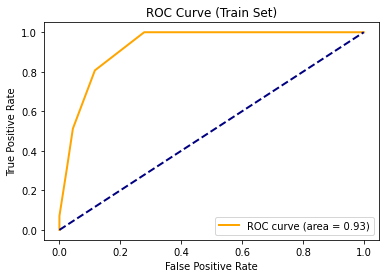

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1605
           1       0.67      0.51      0.58       285

    accuracy                           0.89      1890
   macro avg       0.79      0.73      0.76      1890
weighted avg       0.88      0.89      0.88      1890

Train Overall Precision: 0.8801
Train Overall Recall: 0.8889
Train Overall F1-score: 0.8825



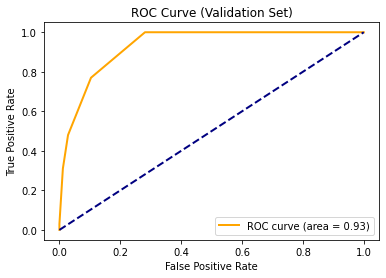

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       530
           1       0.76      0.48      0.59       100

    accuracy                           0.89       630
   macro avg       0.84      0.73      0.76       630
weighted avg       0.89      0.89      0.88       630

Validation Overall Precision: 0.8851
Validation Overall Recall: 0.8937
Validation Overall F1-score: 0.8834



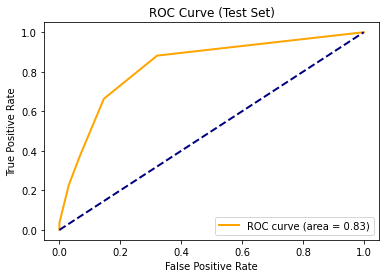

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       520
           1       0.54      0.38      0.45       110

    accuracy                           0.83       630
   macro avg       0.71      0.66      0.67       630
weighted avg       0.82      0.83      0.82       630

Test Overall Precision: 0.8177
Test Overall Recall: 0.8349
Test Overall F1-score: 0.8233


In [47]:
model_with_CV(dataset_name, class_variable)

## 14. Summary of Model Results

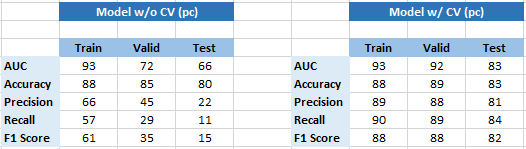

### 14.1. Interpretation with more focus on With CV Test Set metrics

First observation is that the model performs well in the training set and subsequently the performance falls in the validation and test sets. 

Second, it is clear that cross validation has helped improve the model performance. AUC and accuracy are equal or higher in each of the sets in the with CV as compared to no CV. 

But it is important to understand what the numbers of these metrics mean in the context of churn. Metrics of accuracy, recall, precision, f1-score and AUC will be explained through the with CV Test set numbers as follows:

1) **Accuracy:** The model correctly predicts customers who will and not churn, 86% of the time. Although this is good accuracy, it may be misleading because of class variable is imbalanced. There are more customers who will not churn than those who churn.

2) **Recall:** The model predicts 84% of the churns correctly from the actual churns. For each level of the class i.e. for 0 and 1, the recall was 93% and 38%, respectively. So again this is due to the imbalance in the class column. 

3) **Precision:** The percentage of churns predicted by the model that were actually churns was 88. In other words, the model got the churn predictions right 81% of the time of all the churn predictions. Again, the precision of 0 was higher (88%) than 1 (54%). 

4) **F1-Score:** It is the harmonic mean of recall and precision and so means:

5) **AUC:** The probability that the model predicts a churn instead of a non-churn is 83%. 

## 15. Complied Master Function

In [48]:
def master_function():
    dataset_name = input('Name of the dataset: ')
    data = read_csv(dataset_name)
    print(dimensions(dataset_name))
    print(data_types(dataset_name))
    preprocess_data(dataset_name)
    print(missing_vals(dataset_name))
    print(descr(dataset_name))
    extract_numeric_cols(dataset_name)
    boxplots(dataset_name)
    print(boxplot_stats(dataset_name))
    class_variable = class_var_name()
    def cols_for_freq_plots():
        columns_list = input('Enter column names separated by commas: ').split(', ')
        return columns_list
    cols_for_freq_plots = cols_for_freq_plots()
    frequency_plots(dataset_name, class_variable, cols_for_freq_plots)
    def cat_cols():
        cat_cols = input('Enter column names separated by commas: ').split(', ')
        return cat_cols
    categorical_cols = cat_cols()
    binary_categorical_barplots(dataset_name, class_variable, categorical_cols)
    corr_heatmap(dataset_name, class_variable)
    feature_selection_by_corr(dataset_name, class_variable)
    drop_unselected_features(dataset_name, class_variable)
    dimensions2(dataset_name, class_variable)
    tvt_splits_fs(dataset_name, class_variable)
    print(splits_tabulated_fs(dataset_name, class_variable))
    model_without_CV(dataset_name, class_variable)
    model_with_CV(dataset_name, class_variable)

Name of the dataset: iranian_cust_churn.csv
(3150, 14)
Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object
Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64
      Call  Failure Co

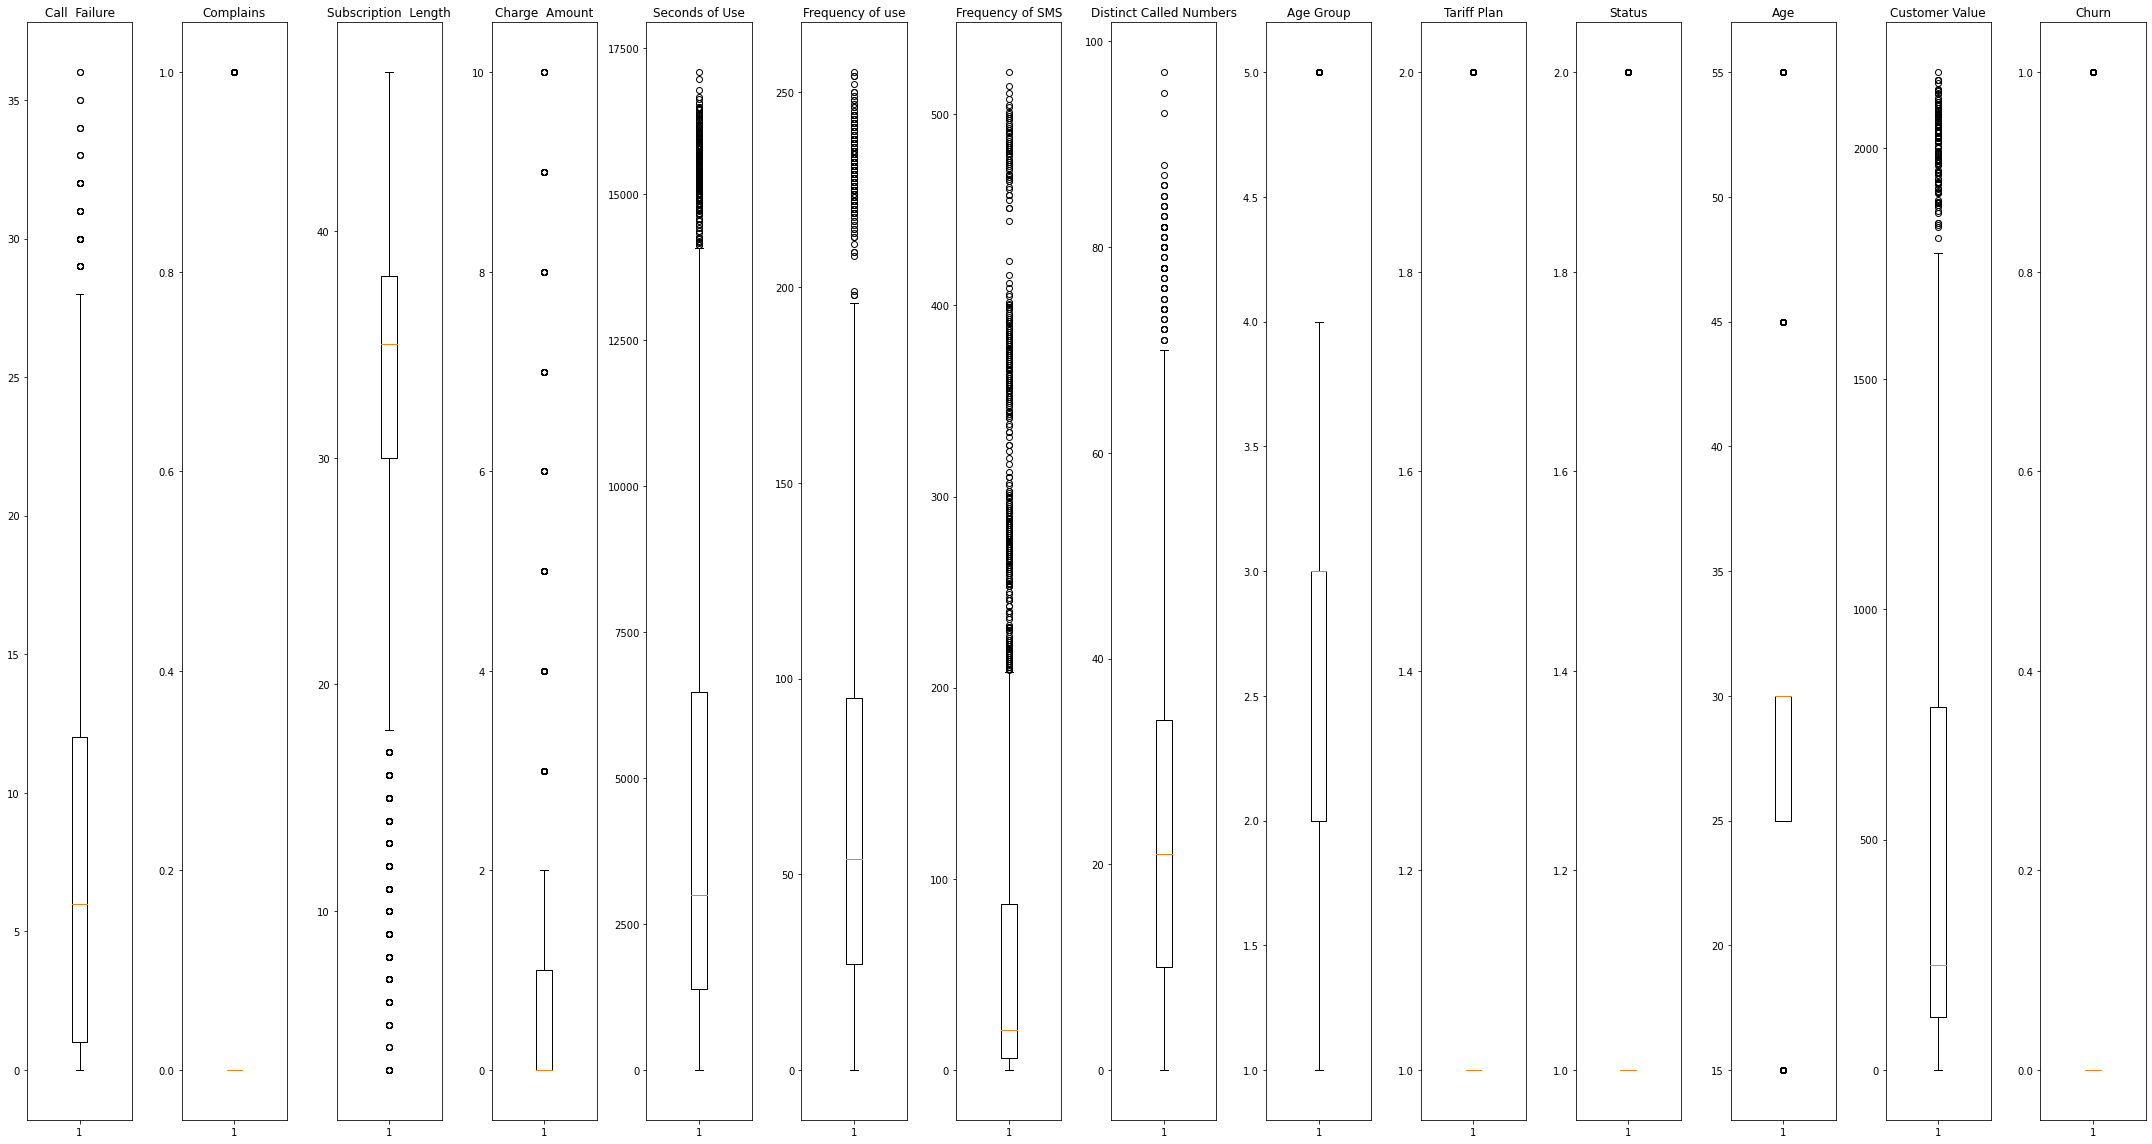

                        whisker_low    min       q1       q2       q3  \
column_name                                                             
Call  Failure                -15.50   0.00     1.00     6.00    12.00   
Complains                      0.00   0.00     0.00     0.00     0.00   
Subscription  Length          18.00   3.00    30.00    35.00    38.00   
Charge  Amount                -1.50   0.00     0.00     0.00     1.00   
Seconds of Use             -6239.25   0.00  1391.25  2990.00  6478.25   
Frequency of use             -75.00   0.00    27.00    54.00    95.00   
Frequency of SMS            -115.50   0.00     6.00    21.00    87.00   
Distinct Called Numbers      -26.00   0.00    10.00    21.00    34.00   
Age Group                      0.50   1.00     2.00     3.00     3.00   
Tariff Plan                    1.00   1.00     1.00     1.00     1.00   
Status                         1.00   1.00     1.00     1.00     1.00   
Age                           17.50  15.00    25.00

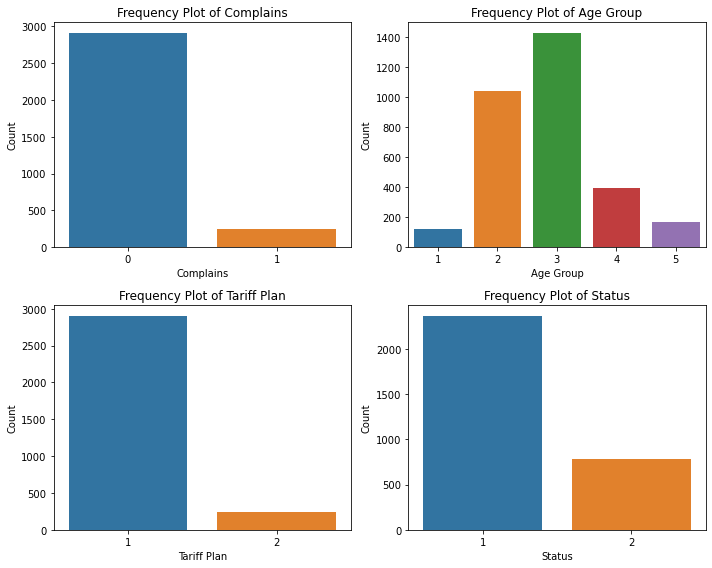

Enter column names separated by commas: Complains, Age Group, Tariff Plan, Status


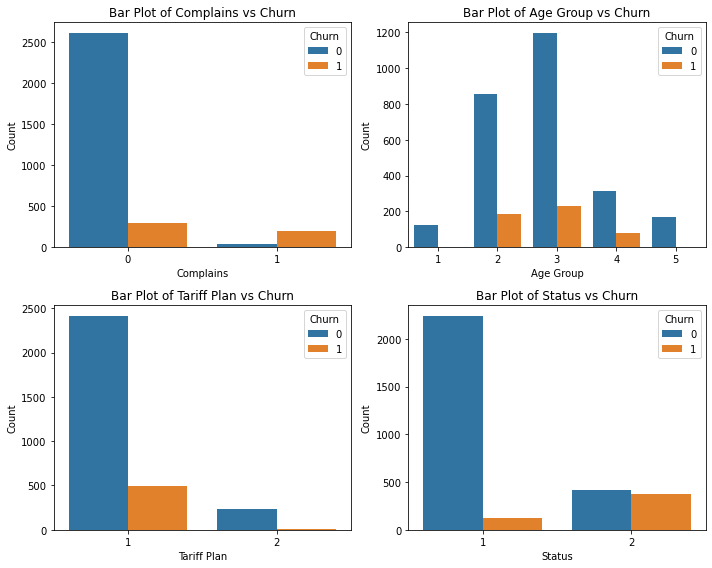

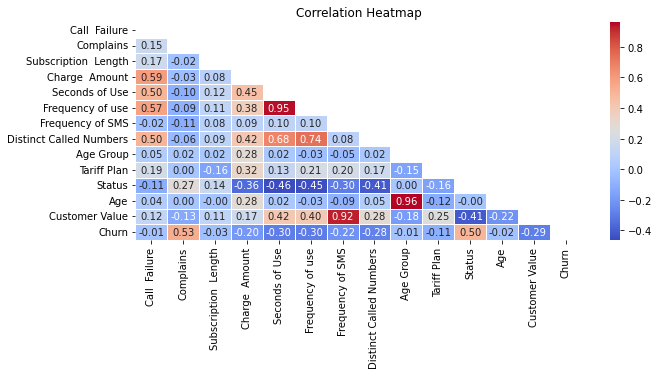

         Rows  Columns
X_train  1890        8
X_valid   630        8
X_test    630        8
y_train  1890        1
y_valid   630        1
y_test    630        1
ROC for Train Set:


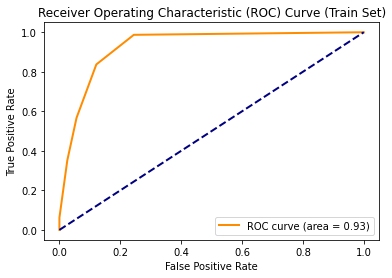

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1583
           1       0.66      0.57      0.61       307

    accuracy                           0.88      1890
   macro avg       0.79      0.76      0.77      1890
weighted avg       0.88      0.88      0.88      1890

Train Precision: 0.6616
Train Recall: 0.5668
Train F1-score: 0.6105
Train AUC: 0.9279

ROC for Validation Set:


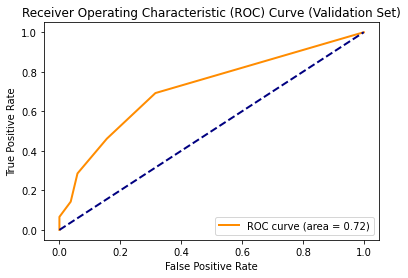

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       539
           1       0.45      0.29      0.35        91

    accuracy                           0.85       630
   macro avg       0.67      0.61      0.63       630
weighted avg       0.82      0.85      0.83       630

Validation Precision: 0.4483
Validation Recall: 0.2857
Validation F1-score: 0.3490
Validation AUC: 0.7160

ROC for Test Set:


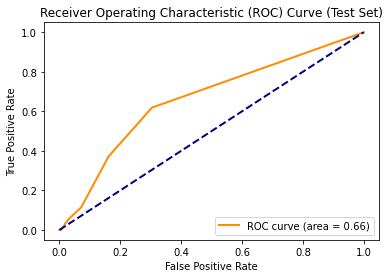

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       533
           1       0.22      0.11      0.15        97

    accuracy                           0.80       630
   macro avg       0.54      0.52      0.52       630
weighted avg       0.76      0.80      0.78       630

Test Precision: 0.2245
Test Recall: 0.1134
Test F1-score: 0.1507
Test AUC: 0.6598


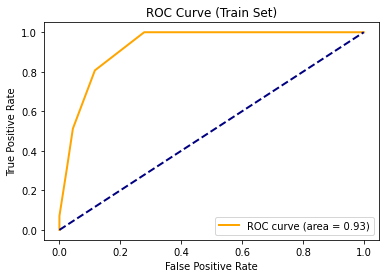

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1605
           1       0.67      0.51      0.58       285

    accuracy                           0.89      1890
   macro avg       0.79      0.73      0.76      1890
weighted avg       0.88      0.89      0.88      1890

Train Overall Precision: 0.8801
Train Overall Recall: 0.8889
Train Overall F1-score: 0.8825



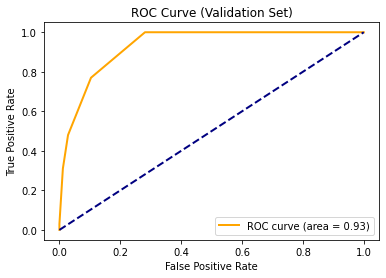

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       530
           1       0.76      0.48      0.59       100

    accuracy                           0.89       630
   macro avg       0.84      0.73      0.76       630
weighted avg       0.89      0.89      0.88       630

Validation Overall Precision: 0.8851
Validation Overall Recall: 0.8937
Validation Overall F1-score: 0.8834



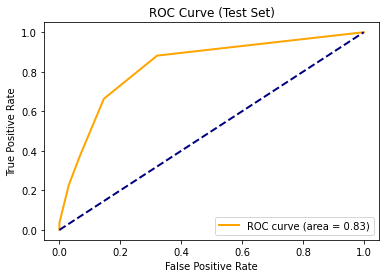

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       520
           1       0.54      0.38      0.45       110

    accuracy                           0.83       630
   macro avg       0.71      0.66      0.67       630
weighted avg       0.82      0.83      0.82       630

Test Overall Precision: 0.8177
Test Overall Recall: 0.8349
Test Overall F1-score: 0.8233


In [49]:
master_function()